In [3]:
from urllib.request import urlretrieve
import zipfile
from pathlib import Path
import os

url = 'https://www.abs.gov.au/census/find-census-data/datapacks/download/2021_GCP_POA_for_AUS_short-header.zip'

urlretrieve(url, Path('../data', 'pop_zip'))


(PosixPath('../data/pop_zip'), <http.client.HTTPMessage at 0x7fe2f37f1df0>)

In [4]:
with zipfile.ZipFile('../data/pop_zip', 'r') as zip_ref:
    zip_ref.extractall('../data')

In [5]:
import shutil

shutil.rmtree('../data/Metadata')
shutil.rmtree('../data/Readme')

In [6]:
os.rename("../data/2021 Census GCP Postal Areas for AUS", "../data/census")

OSError: [Errno 66] Directory not empty: '../data/2021 Census GCP Postal Areas for AUS' -> '../data/census'

In [32]:
import pandas as pd
G01 = pd.read_csv("../data/census/2021Census_G01_AUST_POA.csv")
G02 = pd.read_csv("../data/census/2021Census_G02_AUST_POA.csv")
G017 = pd.read_csv("../data/census/2021Census_G17A_AUST_POA.csv")
G019A = pd.read_csv("../data/census/2021Census_G19A_AUST_POA.csv")
G019B = pd.read_csv("../data/census/2021Census_G19B_AUST_POA.csv")


In [34]:
dataset = pd.merge(G01, G02, how="outer", on=["POA_CODE_2021", "POA_CODE_2021"])
dataset = pd.merge(dataset, G017, how="outer", on=["POA_CODE_2021", "POA_CODE_2021"])
dataset = pd.merge(dataset, G019A, how="outer", on=["POA_CODE_2021", "POA_CODE_2021"])
dataset = pd.merge(dataset, G019B, how="outer", on=["POA_CODE_2021", "POA_CODE_2021"])

dataset = dataset[["POA_CODE_2021", "Tot_P_M", "Tot_P_F","Tot_P_P", "High_yr_schl_comp_Yr_12_eq_M", \
                    "High_yr_schl_comp_Yr_12_eq_F", "High_yr_schl_comp_Yr_12_eq_P", "Median_age_persons", \
                    "Median_mortgage_repay_monthly", "Median_tot_prsnl_inc_weekly", "Median_tot_hhd_inc_weekly", \
                    "M_Cancer_Tot", "M_Dementia_Tot", "M_Mental_health_cond_Tot", "M_None_Tot", "F_Cancer_Tot", \
                     "F_Dementia_Tot", "F_Mental_health_cond_Tot", "F_None_Tot", "M_Neg_Nil_income_Tot", "F_Neg_Nil_income_Tot"]]

# "M_Tot_Tot" from health dataset, G019A

In [35]:
# Feature Engineering

import re

def strip_it(code):
    return code[3:]

dataset['postcode'] = dataset['POA_CODE_2021'].apply(strip_it)
dataset['comp_Yr_12_eq_percent'] = dataset['High_yr_schl_comp_Yr_12_eq_P'] / dataset['Tot_P_P']
dataset['comp_Yr_12_eq_percent_M'] = dataset['High_yr_schl_comp_Yr_12_eq_M'] / dataset['Tot_P_M']
dataset['comp_Yr_12_eq_percent_F'] = dataset['High_yr_schl_comp_Yr_12_eq_F'] / dataset['Tot_P_F']
dataset['house_repay_to_income'] = dataset["Median_mortgage_repay_monthly"] / (dataset["Median_tot_hhd_inc_weekly"] * 4.333333)

dataset['nill_income_percent_M'] = dataset['M_Neg_Nil_income_Tot'] / dataset['Tot_P_M']
dataset['nill_income_percent_F'] = dataset['F_Neg_Nil_income_Tot'] / dataset['Tot_P_M']

# Health Features
dataset['cancer_percent_M'] = dataset['M_Cancer_Tot'] / dataset['Tot_P_M']
dataset['cancer_percent_F'] = dataset['F_Cancer_Tot'] / dataset['Tot_P_F']

dataset['dementia_percent_M'] = dataset['M_Dementia_Tot'] / dataset['Tot_P_M']
dataset['dementia_percent_F'] = dataset['F_Dementia_Tot'] / dataset['Tot_P_F']

dataset['dementia_percent_M'] = dataset['M_Dementia_Tot'] / dataset['Tot_P_M']
dataset['dementia_percent_F'] = dataset['F_Dementia_Tot'] / dataset['Tot_P_F']

dataset['mental_percent_M'] = dataset['M_Mental_health_cond_Tot'] / dataset['Tot_P_M']
dataset['mental_percent_F'] = dataset['F_Mental_health_cond_Tot'] / dataset['Tot_P_F']

dataset['none_percent_M'] = dataset['M_None_Tot'] / dataset['Tot_P_M']
dataset['none_percent_F'] = dataset['F_None_Tot'] / dataset['Tot_P_F']

# "Median_age_persons", "Median_mortgage_repay_monthly", "Median_tot_prsnl_inc_weekly", "Median_tot_hhd_inc_weekly"

In [36]:
feature_list = ["postcode", "comp_Yr_12_eq_percent", "comp_Yr_12_eq_percent_M", "comp_Yr_12_eq_percent_F", "house_repay_to_income", "Median_age_persons", "Median_tot_prsnl_inc_weekly", "Median_mortgage_repay_monthly"]

# Append nill income features
for i in ["nill_income_percent_M", "nill_income_percent_F"]:
    feature_list.append(i)

# Append health features
for i in ["cancer_percent_M", "cancer_percent_F", "dementia_percent_M", "dementia_percent_F", "mental_percent_M", "mental_percent_F", "none_percent_M", "none_percent_F"]:
    feature_list.append(i)


dataset2 = dataset[feature_list]
dataset2

,postcode,comp_Yr_12_eq_percent,comp_Yr_12_eq_percent_M,comp_Yr_12_eq_percent_F,house_repay_to_income,Median_age_persons,Median_tot_prsnl_inc_weekly,Median_mortgage_repay_monthly,nill_income_percent_M,nill_income_percent_F,cancer_percent_M,cancer_percent_F,dementia_percent_M,dementia_percent_F,mental_percent_M,mental_percent_F,none_percent_M,none_percent_F
0,2000,0.771728,0.769739,0.773937,0.290406,32,941,2800,0.072277,0.105463,0.012093,0.011449,0.001195,0.001094,0.030584,0.037993,0.763341,0.783417
1,2007,0.760864,0.760563,0.760977,0.319625,30,772,2500,0.096731,0.126495,0.007441,0.009879,0.000797,0.002195,0.040659,0.071625,0.756046,0.734632
2,2008,0.809423,0.801505,0.816840,0.343643,28,860,2600,0.126999,0.152023,0.010913,0.008656,0.000941,0.001967,0.063594,0.110565,0.723612,0.702538
3,2009,0.705720,0.709748,0.700973,0.266785,37,1297,2800,0.047567,0.081364,0.020811,0.025211,0.002504,0.001436,0.042873,0.072922,0.685808,0.677677
4,2010,0.756949,0.753972,0.761866,0.291350,36,1479,2900,0.031714,0.031519,0.021360,0.020303,0.006447,0.008121,0.088630,0.118300,0.634084,0.628226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,2899,0.388483,0.332075,0.442478,0.253378,50,736,1300,0.029245,0.050000,0.035849,0.031858,0.004717,0.011504,0.044340,0.054867,0.582075,0.585841
2639,6798,0.315012,0.268390,0.386861,0.142248,38,1233,1300,0.032803,0.057654,0.002982,0.008759,0.000000,0.000000,0.019881,0.035036,0.494036,0.629197
2640,6799,0.293423,0.251656,0.349315,0.180658,40,741,1972,0.039735,0.079470,0.000000,0.000000,0.000000,0.000000,0.000000,0.010274,0.668874,0.592466
2641,9494,0.283777,0.247478,0.328896,NaN,0,0,0,0.060379,0.062390,0.021108,0.021625,0.002565,0.002068,0.111781,0.155811,0.365603,0.385802


In [32]:
dataset2.to_csv('../data/curated/census.csv', header=True, index=False)

In [21]:
dataset2["Median_age_persons"].describe()

count    2643.000000
mean       43.384412
std         7.489671
min         0.000000
25%        38.000000
50%        43.000000
75%        48.000000
max        79.000000
Name: Median_age_persons, dtype: float64

Text(0.5, 1.0, 'Median Age of Suburb by order of appearance')

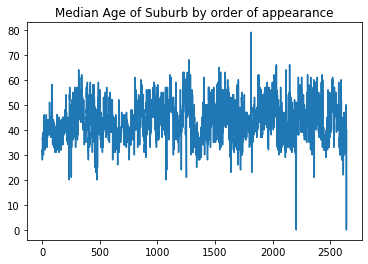

In [28]:
import matplotlib.pyplot as plt
plt.plot(dataset2["Median_age_persons"])
plt.title("Median Age of Suburb by order of appearance")

In [23]:
dataset2[dataset2["Median_age_persons"] == 0]

,postcode,comp_Yr_12_eq_percent,comp_Yr_12_eq_percent_M,comp_Yr_12_eq_percent_F,house_repay_to_income,Median_age_persons,Median_tot_prsnl_inc_weekly,Median_mortgage_repay_monthly,cancer_percent_M,cancer_percent_F,dementia_percent_M,dementia_percent_F,mental_percent_M,mental_percent_F,none_percent_M,none_percent_F
2205,6182,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2641,9494,0.283777,0.247478,0.328896,NaN,0,0,0,0.021108,0.021625,0.002565,0.002068,0.111781,0.155811,0.365603,0.385802


In [27]:
dataset2[dataset2["Median_mortgage_repay_monthly"] == 0]

,postcode,comp_Yr_12_eq_percent,comp_Yr_12_eq_percent_M,comp_Yr_12_eq_percent_F,house_repay_to_income,Median_age_persons,Median_tot_prsnl_inc_weekly,Median_mortgage_repay_monthly,cancer_percent_M,cancer_percent_F,dementia_percent_M,dementia_percent_F,mental_percent_M,mental_percent_F,none_percent_M,none_percent_F
234,2308,0.712813,0.703151,0.719737,NaN,20,302,0,0.000000,0.005263,0.000000,0.000000,0.043118,0.136842,0.532338,0.464474
253,2331,0.514630,0.509804,0.578947,0.0,21,936,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.652406,0.473684
289,2386,0.307167,0.269231,0.316547,0.0,48,671,0,0.000000,0.000000,0.000000,0.000000,0.019231,0.064748,0.589744,0.496403
290,2387,0.333333,0.285714,0.397727,0.0,33,915,0,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.580357,0.545455
305,2408,0.361290,0.289474,0.423077,0.0,40,1108,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.625000,0.576923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,7139,0.375000,0.000000,0.000000,0.0,49,1499,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2539,7257,0.218750,0.212121,0.125000,0.0,51,421,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.424242,0.343750
2601,0853,0.497647,0.500000,0.506562,0.0,29,1513,0,0.012876,0.000000,0.000000,0.000000,0.030043,0.049869,0.714592,0.740157
2604,0862,0.283916,0.244275,0.331269,0.0,28,775,0,0.012723,0.009288,0.000000,0.000000,0.040712,0.046440,0.692112,0.665635
